# Task 1.2: Apply Quantum Operations (Part 3)
## Objective 2: The QuantumCircuit Object

**Overview:**
This notebook focuses on manipulating the `QuantumCircuit` class itself, rather than specific gates.
*   **Circuit Construction:** Initialization, Composition, and Decompositions.
*   **Control Flow:** If/Else, For Loops, and Switch statements.
*   **Circuit Metrics:** Depth, Width, and Timing.

In [1]:

import warnings
# Filter the specific warning from Qiskit about Cregbundle
warnings.filterwarnings('ignore', message='.*Cregbundle set to False.*', category=RuntimeWarning)
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit, BoxOp
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_state_city
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit.library import XGate
import qiskit.circuit.library as library


# Try to import GenericBackendV2, handling different Qiskit versions
try:
    from qiskit.providers.fake_provider import GenericBackendV2
except ImportError:
    try:
        from qiskit_ibm_runtime.fake_provider import GenericBackendV2
    except ImportError:
        GenericBackendV2 = None
        print("Warning: GenericBackendV2 not found. Transpilation examples might skip.")


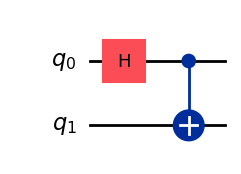

In [2]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a text drawing of the circuit.
qc.draw('mpl')

### Core Attribute: `data`

The `data` attribute provides direct access to the list of instructions that make up the circuit. Each item in the list is a `CircuitInstruction` object containing the operation and the qubits/clbits it applies to.

In [3]:
print(qc.data)

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())]


### Global Phase

The `global_phase` attribute tracks the global phase of the circuit in radians. While global phase does not affect measurement probabilities, it is crucial when controlling the circuit or combining it with others.

In [4]:
print(qc.global_phase)

0.0


### Registers

You can access the quantum (`qregs`) and classical (`cregs`) registers associated with the circuit. This is useful for inspecting the circuit's structure.

In [5]:
print(qc.qregs)
print(qc.cregs)

[QuantumRegister(2, 'q')]
[]


### Layout

The `layout` attribute (typically populated after transpilation) shows how the virtual qubits in your circuit map to the physical qubits on a device.

In [6]:
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler import generate_preset_pass_manager
 
# Create circuit to test transpiler on
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.swap(1, 2)
qc.cx(0, 1)
 
# Add measurements to the circuit
qc.measure([0, 1, 2], [0, 1, 2])
 
# Specify the QPU to target
backend = GenericBackendV2(3)
 
# Transpile the circuit
pass_manager = generate_preset_pass_manager(
optimization_level=1, backend=backend
)
transpiled = pass_manager.run(qc)
 
# Print the layout after transpilation
print(transpiled.layout.routing_permutation())

[0, 1, 2]


## Circuit Construction Methods

These methods help in creating and manipulating circuit objects.

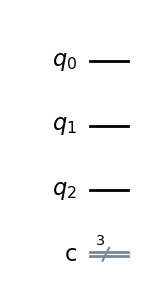

In [7]:
qc2 = qc.copy_empty_like()
qc2.draw('mpl')

### Copy

Create a deep copy of the circuit. This is useful when you want to create a new circuit based on an existing one without modifying the original.

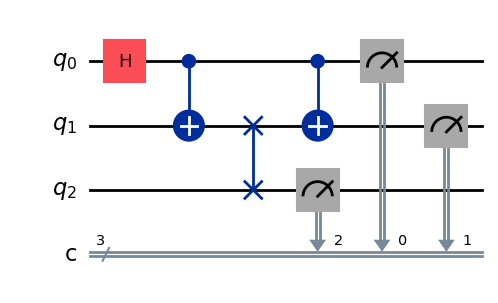

In [8]:
qc_copy = qc.copy()
# Modify copy to show independence
qc_copy.x(0)
qc.draw('mpl')


### from_qasm_str

Imports a circuit that is defined in OpenQASM 2.0 string format.

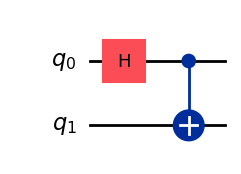

In [9]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0],q[1];"""
qc = QuantumCircuit.from_qasm_str(qasm_str)
qc.draw('mpl')


## Data Objects

Methods for managing the wires (qubits and classical bits) and variables in the circuit.

In [10]:
from qiskit.circuit import QuantumCircuit
 
qc = QuantumCircuit(2)
my_var = qc.add_var("my_var", False)

### add_bits

Manually add individual quantum or classical bits to the circuit. This is useful for building flexible circuits wire-by-wire.

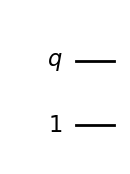

In [11]:
from qiskit.circuit import Qubit
qc = QuantumCircuit(1)
new_bit = Qubit()
qc.add_bits([new_bit])
qc.draw('mpl')


### add_register

Add an entire register (`QuantumRegister` or `ClassicalRegister`) to the circuit.

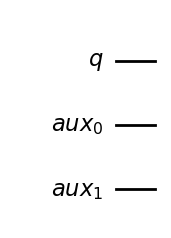

In [12]:
from qiskit import QuantumRegister
qc = QuantumCircuit(1)
qr = QuantumRegister(2, 'aux')
qc.add_register(qr)
qc.draw('mpl')


### add_input

Add a real-time classical input variable. This is a feature for dynamic circuits where inputs might be provided at runtime.

In [13]:
from qiskit import QuantumCircuit
import qiskit
from qiskit.circuit.classical import types

qc = QuantumCircuit(1)

# Preferred usage: pass an instance from qiskit.circuit.classical.types
# Older code sometimes used a deprecated `dtype` keyword or different signatures,
# so we attempt the modern call and provide a fallback with an explanatory note.
try:
    # Add a boolean input variable named 'x' (modern API)
    x_var = qc.add_input("x", types.Bool())
    print("Successfully added input variable:", x_var)
except TypeError:
    try:
        # Some Qiskit versions accept the type class itself as a fallback
        x_var = qc.add_input("x", types.Bool)
        print("Successfully added input variable (fallback):", x_var)
    except Exception as e:
        print("Error adding input variable (see note above):", e)

# Note: if you previously saw errors, that was likely due to a deprecated/changed
# add_input signature in older Qiskit versions. The approach above attempts
# the modern call first and falls back if needed.

Successfully added input variable: Var(UUID('ee5a1bcf-27ff-4d37-bf53-0da627c9b71f'), Bool(), name='x')


### Working with Bits

Qiskit provides tools to seamlessly convert between integer indices and bit instances.

In [14]:
from qiskit.circuit import QuantumCircuit, Qubit
 
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure([0, 1, 2], [0, 1, 2])
 
# The `.qubits` and `.clbits` fields are not integers.
assert isinstance(qc.data[0].qubits[0], Qubit)
# ... but we can use `find_bit` to retrieve them.
assert qc.find_bit(qc.data[0].qubits[0]).index == 0
 
simple = [
    (
        instruction.operation.name,
        [qc.find_bit(bit).index for bit in instruction.qubits],
        [qc.find_bit(bit).index for bit in instruction.clbits],
    )
    for instruction in qc.data
]

## Adding Operations

Methods to add instructions and combine circuits.
This includes operations that change the circuit structure; for example, `tensor` composes systems into a larger Hilbert space — i.e., it is equivalent to creating a larger system whose state space is the tensor product of the operand systems.

In [15]:
qc2.x(0)
qc.tensor(qc2).draw()

┌───┐                   
q_0: ┤ X ├───────────────────
     └───┘                   
q_1: ────────────────────────
                             
q_2: ────────────────────────
     ┌───┐          ┌─┐      
q_3: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_4: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_5: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 6/════════════════╩══╩══╩═
                     3  4  5

### append

The foundational method to add any `Instruction` object to the circuit. Most gate methods call this internally.

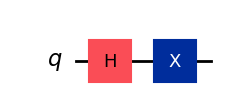

In [16]:
from qiskit.circuit.library import XGate
qc = QuantumCircuit(1)
qc.h(0)
# Append an X gate
qc.append(XGate(), [0])
qc.draw('mpl')


### compose

Combine this circuit with another circuit. Unlike `append`, `compose` flattens the other circuit into this one, rather than adding it as a single opaque instruction.

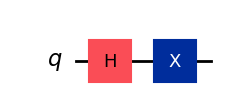

In [17]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc2 = QuantumCircuit(1)
qc2.x(0)
# Compose qc2 onto qc1
qc = qc1.compose(qc2, [0])
qc.draw('mpl')


### Compose vs Append

`compose()` flattens the second circuit into the first so its gates appear inline. `append()` adds the other circuit as a single opaque instruction (a boxed gate) — visually you'll see one case expanded and the other as a single box. The example below shows `append()` on the same small circuits so you can compare the two drawings.

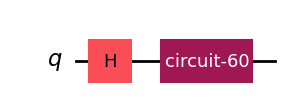

In [18]:
# Demonstrate append() so it appears as an opaque instruction
qc1 = QuantumCircuit(1)
qc1.h(0)
qc2 = QuantumCircuit(1)
qc2.x(0)
# Make a copy so we don't mutate the previous example
qc_app = qc1.copy()
# Convert qc2 into a single gate/instruction and append it
qc_app.append(qc2.to_gate(), [0])
qc_app.draw('mpl')


## Standard Instructions

These methods implement standard quantum circuit operations.

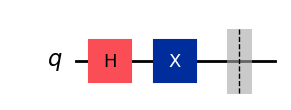

In [19]:
qc.barrier()

qc.draw('mpl')

### delay

Apply a delay (idle time) to a qubit. This is used in scheduling and noise characterization tasks. Delays represent idle/waiting time for qubits — they model scheduling pauses and exposure to decoherence, so they are useful when reasoning about timing and noise in experiments.

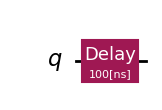

In [20]:
qc = QuantumCircuit(1)
qc.delay(100, 0, unit='ns')
qc.draw('mpl')


### initialize

Initialize qubits to a specific state (e.g., from a statevector). Note that this is not a unitary operation in general and involves reset/prep.

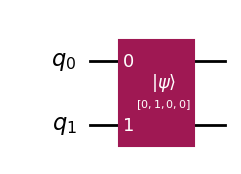

In [21]:
qc = QuantumCircuit(2)
qc.initialize([0, 1, 0, 0], [0, 1]) # Initialize to |01>
qc.draw('mpl')


### reset

Reset a qubit to the |0> state mid-circuit. This is a non-unitary dynamic operation.

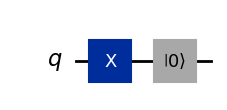

In [22]:
qc = QuantumCircuit(1)
qc.x(0)
qc.reset(0)
qc.draw('mpl')


### store

Store a classical value into a classical bit. This is part of Qiskit's dynamic circuit capabilities.

Successfully added a 'store' instruction to the circuit.


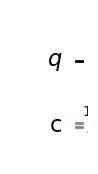


--- Environment Info ---
qiskit version: 2.2.3
Last instruction in circuit data: CircuitInstruction(operation=Instruction(name='store', num_qubits=0, num_clbits=0, params=[Var(<Clbit register=(1, "c"), index=0>, Bool()), Cast(Value(1, Uint(8)), Bool(), implicit=True)]), qubits=(), clbits=())


In [23]:
# Import the necessary components from Qiskit
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.classical import types, expr

# --- The Correct Way to use qc.store in Modern Qiskit ---

# 1. Create a circuit with classical bits
qc = QuantumCircuit(1, 1)
target_clbit = qc.clbits[0]

# 2. Define the classical value you want to store.
# We use expr.lift() to create a classical literal from a Python value and a Qiskit type.
# For example, let's store the integer value 1 into an 8-bit unsigned integer type.
uint_value_to_store = expr.lift(1, types.Uint(8))

# 3. Use the store instruction within a try...except block for safety
try:
    qc.store(target_clbit, uint_value_to_store)
    print("Successfully added a 'store' instruction to the circuit.")
    # Draw the circuit to see the 'Store' instruction
    display(qc.draw('mpl'))
except Exception as e:
    print(f"The 'store' instruction failed: {e}")

# --- Environment Info ---
print("\n--- Environment Info ---")
# The correct way to get the version in modern Qiskit
print('qiskit version:', qiskit.__version__)

# Inspect the circuit data to confirm the instruction was added
if qc.data:
    print('Last instruction in circuit data:', qc.data[-1])
else:
    print('No instructions in the circuit.')

## Uncontrolled Unitary Gates

Standard single and multi-qubit gates that do not have control conditions (e.g., X, H, Swap).

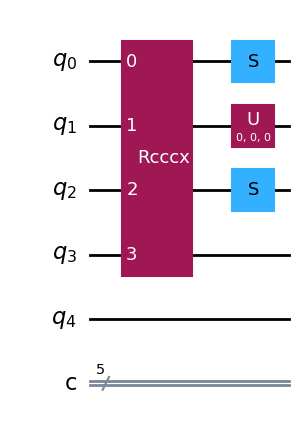

In [24]:
qc = QuantumCircuit(5,5)

qc.rcccx(0,1,2,3)
qc.s([0,2])
qc.u(0,0,0,1)

qc.draw('mpl')

## Controlled Unitary Gates

Gates that are activated based on the state of control qubits (e.g., CX, CCX, CRZ).

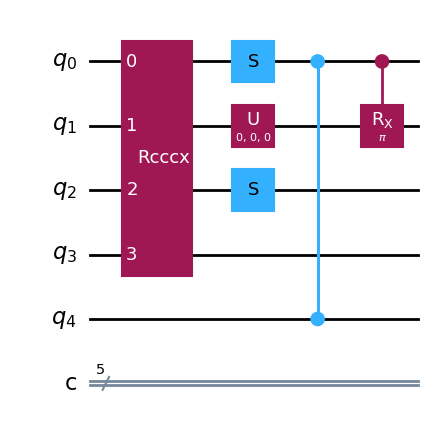

In [25]:
qc.cz(0,4)
qc.crx(np.pi,0,1)


qc.draw('mpl')

## Multiply Controlled Gates

Gates with multiple control lines, offering complex conditional logic.

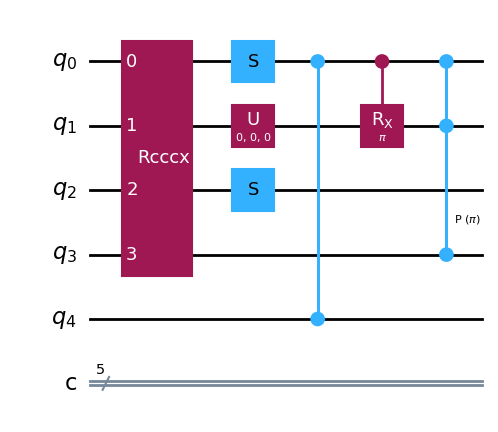

In [26]:
qc.mcp(np.pi,[0,1],3)

qc.draw('mpl')

## Control Flow (Dynamic Circuits)

These operations enable dynamic circuits that can change their behavior based on mid-circuit measurement results.

In [27]:
from qiskit.circuit import QuantumCircuit, BoxOp
 
body_0 = QuantumCircuit(4)
body_0.cz(0, 1)
body_0.cz(2, 3)
 
# Note that the qubit indices inside a body related only to the body.  The
# association with qubits in the containing circuit is made by the ``qubits``
# argument to `QuantumCircuit.box`.
body_1 = QuantumCircuit(5)
body_1.cz(0, 1)
body_1.cz(2, 3)
 
qc = QuantumCircuit(9)
qc.box(body_0, [0, 1, 2, 3], [])
qc.box(body_1, [4, 5, 6, 7, 8], [])

qc.draw()

┌───────     ───────┐                      
q_0: ┤        ─■─        ├──────────────────────
     │         │         │                      
q_1: ┤        ─■─        ├──────────────────────
     │ Box-0       End-0 │                      
q_2: ┤        ─■─        ├──────────────────────
     │         │         │                      
q_3: ┤        ─■─        ├──────────────────────
     └───────     ───────┘┌───────     ───────┐ 
q_4: ─────────────────────┤        ─■─        ├─
                          │         │         │ 
q_5: ─────────────────────┤        ─■─        ├─
                          │                   │ 
q_6: ─────────────────────┤ Box-0  ─■─  End-0 ├─
                          │         │         │ 
q_7: ─────────────────────┤        ─■─        ├─
                          │                   │ 
q_8: ─────────────────────┤        ───        ├─
                          └───────     ───────┘

In [28]:
from qiskit.circuit import QuantumCircuit
 
 
qc = QuantumCircuit(9)
with qc.box():
    qc.cz(0, 1)
    qc.cz(2, 3)
with qc.box():
    qc.cz(4, 5)
    qc.cz(6, 7)
    qc.noop(8)

qc.draw()

┌───────     ───────┐                      
q_0: ┤        ─■─        ├──────────────────────
     │         │         │                      
q_1: ┤        ─■─        ├──────────────────────
     │ Box-0       End-0 │                      
q_2: ┤        ─■─        ├──────────────────────
     │         │         │                      
q_3: ┤        ─■─        ├──────────────────────
     └───────     ───────┘┌───────     ───────┐ 
q_4: ─────────────────────┤        ─■─        ├─
                          │         │         │ 
q_5: ─────────────────────┤        ─■─        ├─
                          │                   │ 
q_6: ─────────────────────┤ Box-0  ─■─  End-0 ├─
                          │         │         │ 
q_7: ─────────────────────┤        ─■─        ├─
                          │                   │ 
q_8: ─────────────────────┤        ───        ├─
                          └───────     ───────┘

In [29]:
import warnings
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)
 
with qc.for_loop(range(5)) as i:
    qc.x(0)
    qc.cx(0, 1)
    qc.measure(0, 0)
    with qc.if_test((0, True)):
        qc.break_loop()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    qc.draw()

In [30]:
from qiskit.circuit import QuantumCircuit
 
qc = QuantumCircuit(3)
with qc.box():
    # This control-flow block will only use qubits 0 and 1.
    qc.cx(0, 1)
with qc.box():
    # This control-flow block will contain only the same operation as the previous
    # block, but it will also mark qubit 2 as "used" by the box.
    qc.cx(0, 1)
    qc.noop(2)

### if_else

Executes one block of instructions if a condition is true, and optionally another block if it is false.

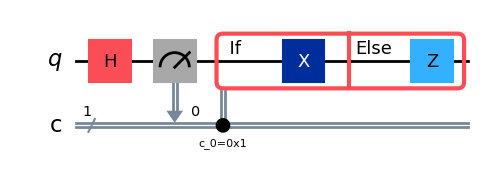

In [31]:
import warnings
# Suppress specific Qiskit warning about Cregbundle
warnings.filterwarnings('ignore', message='.*Cregbundle.*')
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
with qc.if_test((0, 1)) as else_block:
    qc.x(0)
with else_block:
    qc.z(0)
qc.draw('mpl')


### while_loop

Repeats a block of instructions as long as a classical condition evaluates to true.

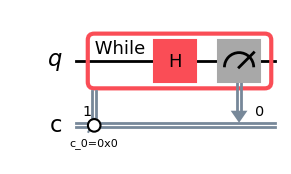

In [32]:
import warnings
# Suppress specific Qiskit warning about Cregbundle
warnings.filterwarnings('ignore', message='.*Cregbundle.*')
qc = QuantumCircuit(1, 1)
with qc.while_loop((0, 0)):
    qc.h(0)
    qc.measure(0, 0)
qc.draw('mpl')


### switch

Executes a specific block of instructions based on the value of a classical expression (like a switch-case statement).

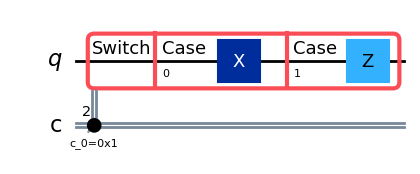

In [33]:
import warnings
# Suppress specific Qiskit warning about Cregbundle
warnings.filterwarnings('ignore', message='.*Cregbundle.*')
qc = QuantumCircuit(1, 2)
with qc.switch(0) as case:
    with case(0):
        qc.x(0)
    with case(1):
        qc.z(0)
qc.draw('mpl')


### continue_loop

Skips the rest of the current iteration and jumps to the next iteration of the nearest enclosing loop.

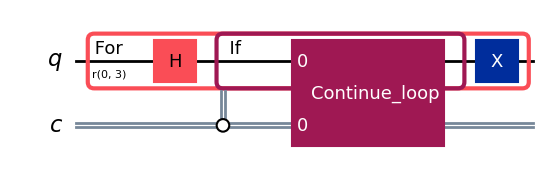

In [34]:
import warnings
# Suppress specific Qiskit warning about Cregbundle
warnings.filterwarnings('ignore', message='.*Cregbundle.*')
qc = QuantumCircuit(1, 1)
with qc.for_loop(range(3)):
    qc.h(0)
    with qc.if_test((0, 0)):
        qc.continue_loop()
    qc.x(0)
qc.draw('mpl')


## Converters

Methods to package a circuit into a single `Instruction` or `Gate` object for reuse.

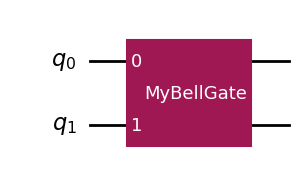

In [35]:
# Create a circuit without measurements for to_gate
qc_gate = QuantumCircuit(2)
qc_gate.h(0)
qc_gate.cx(0, 1)

# Convert to gate
my_gate = qc_gate.to_gate()
my_gate.name = "MyBellGate"

# Use the gate in a new circuit
main_qc = QuantumCircuit(2)
main_qc.append(my_gate, [0, 1])
main_qc.draw('mpl')


## Helper Mutation Methods

Methods that modify the circuit in place, often to prepare it for execution.

In [36]:
qc3= QuantumCircuit(3)

qc3.h(0)
qc3.cx(0,2)
qc3.measure_active()
qc3.draw()


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘  │   ░ └╥┘   
   q_1: ───────┼───░──╫────
             ┌─┴─┐ ░  ║ ┌─┐
   q_2: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [37]:
qc3.remove_final_measurements()
qc3.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘  │  
q_1: ───────┼──
          ┌─┴─┐
q_2: ─────┤ X ├
          └───┘

### measure_all

Adds measurements to ALL qubits, extending the classical register if necessary.

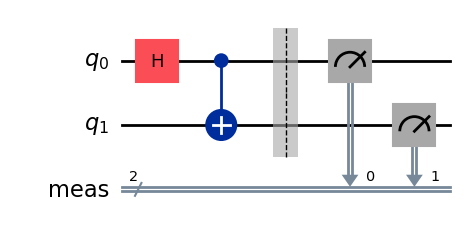

In [38]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')


### clear
Clear all instructions from the circuit.


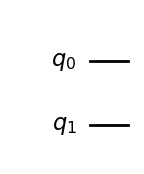

In [39]:
qc = QuantumCircuit(2)
qc.h(0)
qc.clear()
# Circuit should be empty
qc.draw('mpl')


## Circuit Metrics & Scheduling

Tools to analyze the circuit's properties and timing.

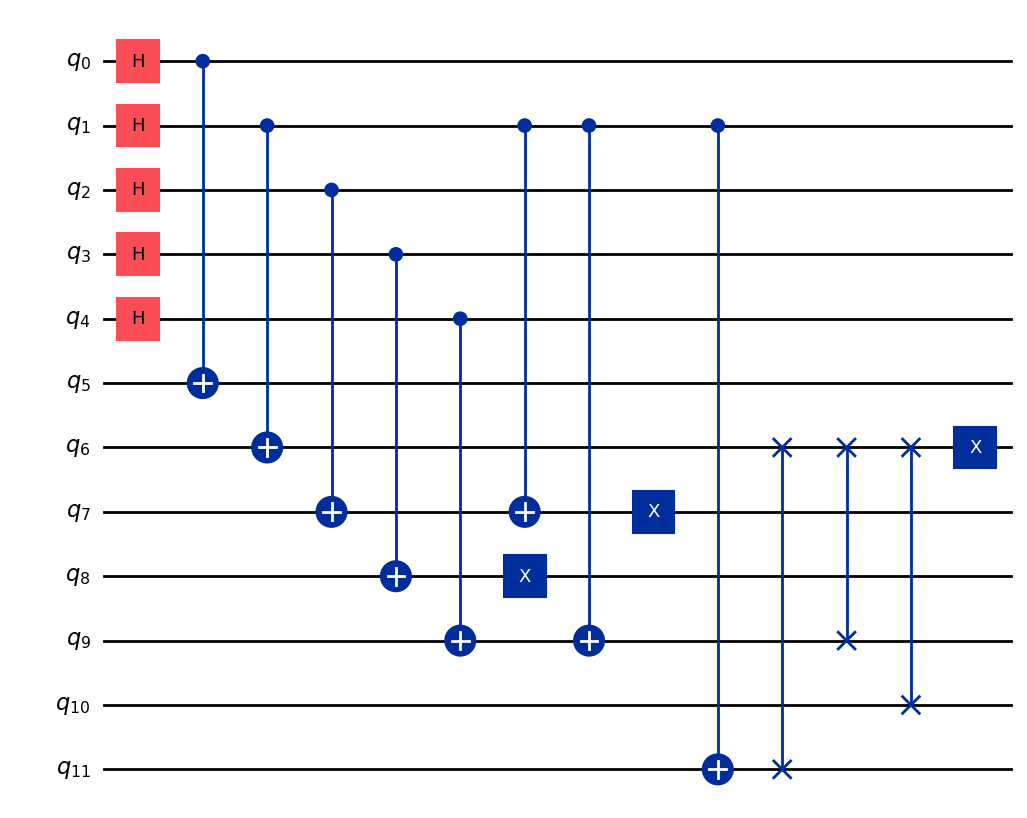

In [40]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)
 
qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw('mpl')

In [41]:
assert qc.width() == 12

In [42]:
assert qc.num_qubits == 12

In [43]:
qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

Accessing Scheduling Information

* estimate_duration
* qubit_duration
* qubit_start_time
* qubit_stop_time

### estimate_duration

Estimates the total duration of the circuit based on gate times provided by a backend.

In [44]:
from qiskit.providers.fake_provider import GenericBackendV2
qc = QuantumCircuit(1)
qc.delay(100, 0, unit='dt')
# Use at least 2 qubits for the fake backend so multi-qubit basis gates exist
backend = GenericBackendV2(num_qubits=2)
# Pass the backend target (timing info) to estimate_duration
print(f"Duration: {qc.estimate_duration(backend.target)}")

Duration: 2.22e-08


### qubit_duration

Returns the duration of operations on a specific qubit.

In [45]:
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler import generate_preset_pass_manager

# Use a fake backend to simulate real hardware timing
backend = GenericBackendV2(num_qubits=2)

# Transpile and schedule the circuit
pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
qc_scheduled = pm.run(qc)

# Now we can query duration with valid timing data
print(f"Qubit 0 duration: {qc_scheduled.qubit_duration(0)}")


Qubit 0 duration: 0


Demo qubit 0 duration: 3301
Demo qubit 0 start time: 0
Demo qubit 0 stop time: 3301


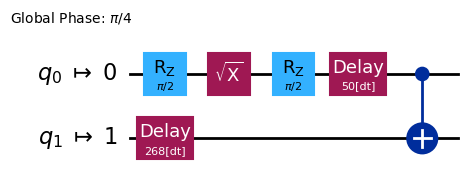

In [46]:
# More illustrative scheduling demo: build a small circuit with gates and delays,
# then schedule it with a fake backend so qubit_duration/start/stop are non-zero.
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.transpiler import generate_preset_pass_manager
from qiskit import QuantumCircuit

backend = GenericBackendV2(num_qubits=3)
# Use transpile with a scheduling method so start/stop times are populated
from qiskit import transpile

qc_demo = QuantumCircuit(2)
qc_demo.h(0)
qc_demo.delay(50, 0, unit='dt')
qc_demo.cx(0, 1)

# Transpile with scheduling (ALAP) to assign instruction start/stop times
qc_demo_scheduled = transpile(qc_demo, backend=backend, optimization_level=1, scheduling_method='alap')
print("Demo qubit 0 duration:", qc_demo_scheduled.qubit_duration(0))
print("Demo qubit 0 start time:", qc_demo_scheduled.qubit_start_time(0))
print("Demo qubit 0 stop time:", qc_demo_scheduled.qubit_stop_time(0))
qc_demo_scheduled.draw('mpl')


### qubit_start_time and qubit_stop_time

These methods return the scheduled start and stop times for operations on a specific qubit.

Crucially, these methods will only return non-zero values if the circuit has been transpiled with a scheduling_method (such as 'alap' or 'asap'). The qc_scheduled object from the previous section was created without a scheduling pass, so its timing information remains at the default of zero, as shown below. This contrasts with the qc_demo_scheduled object, which was scheduled and therefore contains valid timing data.


 Note that querying the qc_scheduled object will still yield zero for start and stop times, as the timing information is only present on the new object returned by transpile when a scheduling_method is specified.

In [47]:
# Check start and stop times for Qubit 0
print(f"Qubit 0 start time: {qc_scheduled.qubit_start_time(0)}")
print(f"Qubit 0 stop time: {qc_scheduled.qubit_stop_time(0)}")


Qubit 0 start time: 0
Qubit 0 stop time: 0


## Instruction Modifiers

Methods that return a new version of the circuit with modified properties (e.g., controlled or inverted).

#### **1. `control()` Method**

**Current Problem:** The code works, but it's not explained what the resulting opaque `circuit-103` box represents or how it relates to the original circuit.

**Proposed Improvement:** Replace the existing markdown and code in cell `[48]` with the following.

**New Markdown Text (for before the `control()` code cell):**

The `.control()` method is a powerful tool that takes an existing circuit or gate and returns a new version with one or more control qubits. This allows you to easily create controlled versions of complex operations without having to manually decompose them.

In the example below, we start with a simple 1-qubit circuit containing a single Hadamard gate. We then use `.control(1)` to create a new, 2-qubit controlled-Hadamard gate. Notice in the output diagram how the original `h` gate is now represented as a single block with a control point on `q0` acting on the target `q1`.

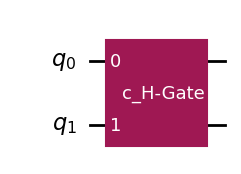

In [48]:
# # qc.control(1).draw('mpl')
# from qiskit import QuantumCircuit
# qc_u = QuantumCircuit(1)
# qc_u.h(0)
# ctrl_gate = qc_u.control(1)
# ctrl_gate.draw('mpl')

from qiskit import QuantumCircuit

# Create a simple circuit for a single H-gate
qc_h = QuantumCircuit(1, name='H-Gate')
qc_h.h(0)

# Add one control qubit to the H-gate circuit
# The original qubit (0) becomes the target (now on wire 1)
# The new control is on wire 0
controlled_h_gate = qc_h.control(1)

# You can now use this new gate in another circuit
main_qc = QuantumCircuit(2)
main_qc.append(controlled_h_gate, [0, 1])
main_qc.draw('mpl')


#### **2. `inverse()` Method**

**Current Problem:** The example of inverting a `Delay` gate is not illustrative. The output looks identical to the input.

**Proposed Improvement:** Replace the markdown and code in cell `[49]` with a much clearer example that shows the reversal of gate order and the use of inverse gates (like `S` and `Sdg`).

**New Markdown Text (for before the `inverse()` code cell):**

---
The `.inverse()` method computes the mathematical inverse (the conjugate transpose, or $U^\dagger$) of a circuit. When applied, it returns a new circuit with all of the gates applied in the reverse order, and with each gate replaced by its own inverse.

This is extremely useful for many algorithms, such as amplitude amplification or algorithms that uncompute a state.

In the example below, notice how the inverted circuit has the `Sdg` (S-dagger) gate and the `H` gate applied in the opposite order of the original.

---

Original Circuit:


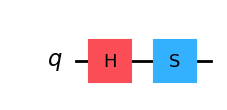


Inverted Circuit:


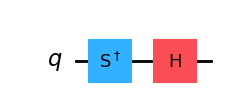

In [49]:
# Create a circuit with a non-symmetrical sequence of gates
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)

print("Original Circuit:")
display(qc.draw('mpl'))

# Now, compute the inverse
qc_inv = qc.inverse()

print("\nInverted Circuit:")
display(qc_inv.draw('mpl'))

#### **3. `power()` Method**

**Current Problem:** Raising a `Delay` to a power is confusing and doesn't demonstrate the true purpose of the method.

**Proposed Improvement:** Replace the markdown and code in cell `[50]` with an example that uses a T-gate and demonstrates the identity $T^2 = S$.

**New Markdown Text (for before the `power()` code cell):**

---
The `.power()` method allows you to raise a gate or circuit to a specific power. This is equivalent to applying the gate's unitary matrix $U$ to itself *n* times ($U^n$).

This is particularly useful for fractional powers or for demonstrating known gate identities. For example, we know that applying a T-gate twice is equivalent to applying a single S-gate ($T^2 = S$). The code below creates a T-gate, raises it to the power of 2, and the resulting circuit diagram correctly shows an S-gate.

---

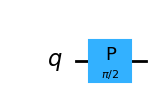

In [50]:
from qiskit.circuit.library import TGate

# Create a circuit with a single T-gate
qc = QuantumCircuit(1)
qc.append(TGate().power(2), [0])

# The output diagram will show an S-gate, because T^2 = S
qc.draw('mpl')

#### **4. `reverse_ops()` Method**

**Current Problem:** Reversing a circuit with only one gate (`Delay`) shows no change, making the example useless.

**Proposed Improvement:** Replace the markdown and code in cell `[51]` with an example that has a clear sequence of gates, making the reversal obvious.

**New Markdown Text (for before the `reverse_ops()` code cell):**

---
The `.reverse_ops()` method reverses the order of instructions in a circuit. It is important to note that this **only reverses the order**; it does **not** take the inverse of each gate (unlike the `.inverse()` method).

This is useful for preparing state preparation circuits or for manually constructing certain algorithmic steps. Compare the original circuit to the reversed one below to see the effect.

---


Original Circuit:


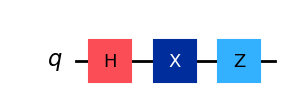


Reversed Circuit:


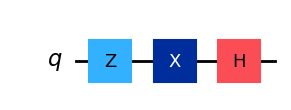

In [51]:
# Create a circuit with a clear sequence of different gates
qc = QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.z(0)

print("Original Circuit:")
display(qc.draw('mpl'))

# Now, reverse the operations
qc_rev = qc.reverse_ops()

print("\nReversed Circuit:")
display(qc_rev.draw('mpl'))

## Visualization: Managing Bit Ordering with `reverse_bits

The `.reverse_bits()` method reverses the order of the qubits in the circuit. This is a crucial helper method for managing Qiskit's bit ordering convention, often referred to as **endianness**.

*   **Qiskit's Default (Little-Endian):** By default, Qiskit uses a little-endian ordering. This means that the qubit at index 0 (`q_0`) is the *least significant bit* (LSB) when representing a quantum state as a binary string. For example, the state $|101\rangle$ would be represented by `q_2=1`, `q_1=0`, `q_0=1`.

*   **Textbook Convention (Big-Endian):** However, many quantum algorithms, textbooks, and academic papers use a big-endian convention, where `q_0` is the *most significant bit* (MSB). In this convention, $|101\rangle$ would be represented by `q_0=1`, `q_1=0`, `q_2=1`.

The `reverse_bits()` method provides a simple way to switch between these two conventions for visualization or before performing certain operations, without having to rebuild the circuit.

In the demonstration below, we create a 3-qubit circuit and apply an `X` gate to `q_0` and a `Z` gate to `q_2`. After reversing, notice how the `X` gate now appears on the `q_2` wire and the `Z` gate on the `q_0` wire in the new diagram, because the bit objects themselves have been re-ordered internally.

---


Original Circuit (Default Little-Endian Ordering):


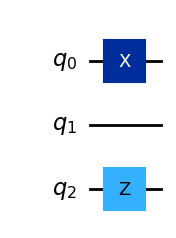


Circuit After reverse_bits() (Big-Endian Ordering):


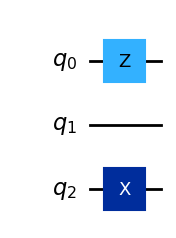

In [52]:
# Create a 3-qubit circuit to clearly show the reversal
qc = QuantumCircuit(3)

# Apply a distinctive gate to the first and last qubits
qc.x(0)
qc.z(2)

print("Original Circuit (Default Little-Endian Ordering):")
display(qc.draw('mpl'))

# Now, reverse the order of the bits
qc_reversed = qc.reverse_bits()

print("\nCircuit After reverse_bits() (Big-Endian Ordering):")
display(qc_reversed.draw('mpl'))